In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
def filter_df(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [4]:
r = readers.CollectionReader('../src/strict_bds/agents')

100%|██████████| 240/240 [00:19<00:00, 12.27it/s]


In [52]:
r_beta = readers.CollectionReader('../src/beta_no_action_clip/agents')

100%|██████████| 160/160 [00:18<00:00,  8.76it/s]


In [3]:
r_base = readers.CollectionReader('../src/base_exp/agents')

100%|██████████| 640/640 [00:22<00:00, 28.42it/s]


In [4]:
r_all = readers.CollectionReader('../src/strict_bds_all/agents')

100%|██████████| 80/80 [00:06<00:00, 11.57it/s]


In [6]:
games = ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
         "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2","InvertedDoublePendulum-v2"]
code_level_opts = {
      'clip_eps': [0.1, 0.2, 0.3, 1e8],
      'kl_penalty_coeff': [0.1, 1.0, 3.0],
      'strict_action_bounds': [True],
      'norm_rewards': ['returns'],
      'policy_net_type': ['CtsPolicy'],
      "adjust_init_std": [False, True],
      'policy_net_type': ['CtsPolicy', 'CtsBetaPolicy'],
      'norm_rewards': ['returns'],
      'norm_advantages': [True, False],
}

# On all 8 games

In [7]:
opt = pd.concat([r_all.df('optimization'), r_base.df('optimization')])
metadata = pd.concat([r_all.df('metadata'), r_base.df('metadata')])
opt['opt_step'] = opt.index
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

/home/eecs/chloehsu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
# The base exps do not have strict action bounds and adjust init std flags
opt = opt.replace(np.nan, False)

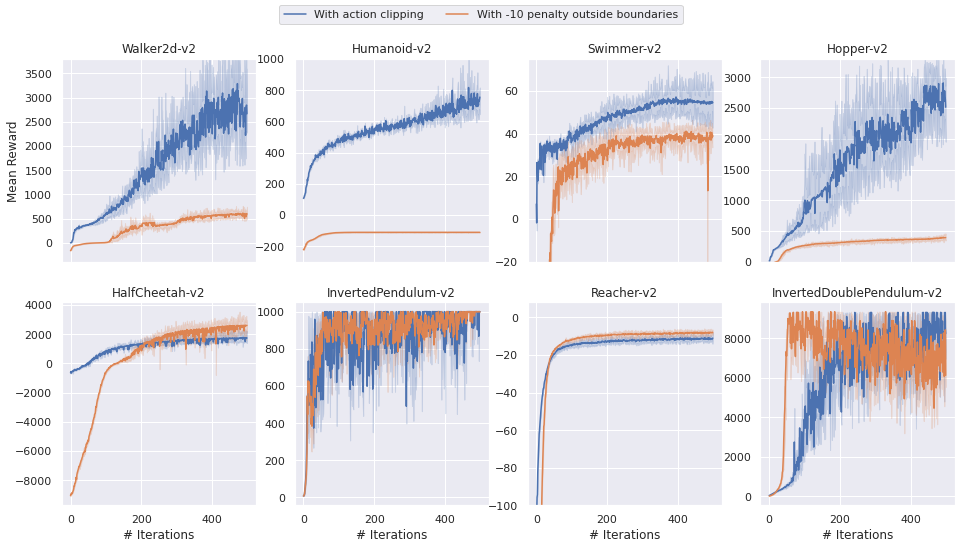

In [14]:
# Plot setup
# CLIP, no adjust std
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True)
ax = ax.flatten()

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=False, adjust_init_std=False,
                     policy_net_type='CtsPolicy', norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=10,
                 ax=ax.flatten()[j], label=f"With action clipping", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, adjust_init_std=False, policy_net_type='CtsPolicy',
                     norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=10,
                 ax=ax.flatten()[j], label=f"With -10 penalty outside boundaries", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
ax[0].set_ylim([None, 3800])
ax[1].set_ylim([-300, 1000])
ax[2].set_ylim([-20, 75])
ax[3].set_ylim([0, 3300])
ax[6].set_ylim([-100, None])
fig.subplots_adjust(top=0.9)
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
    
plt.show()

# Below is on 4 games and with different clipping/kl coeffs

In [54]:
metadata = pd.concat([r.df('metadata'), r_base.df('metadata'), r_beta.df('metadata')])
opt = pd.concat([r.df('optimization'), r_base.df('optimization'), r_beta.df('optimization')])
opt['opt_step'] = opt.index
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

/home/eecs/chloehsu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [55]:
# The base exps do not have strict action bounds and adjust init std flags
opt = opt.replace(np.nan, False)

## Updated plots: -10 reward outside boundaries

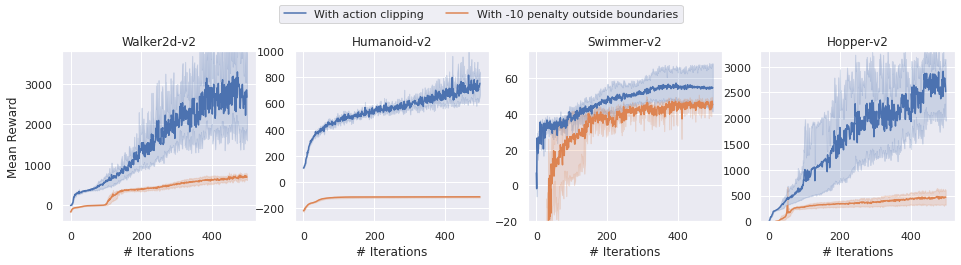

In [48]:
# Plot setup
# CLIP, no adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,3.5))

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=False, adjust_init_std=False,
                     policy_net_type='CtsPolicy', norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"With action clipping", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, adjust_init_std=False, policy_net_type='CtsPolicy',
                     norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"With -10 penalty outside boundaries", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
ax[0].set_ylim([None, 3800])
ax[1].set_ylim([-300, 1000])
ax[2].set_ylim([-20, 75])
ax[3].set_ylim([0, 3300])
fig.subplots_adjust(top=0.9)
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
fig.subplots_adjust(top=0.8)
    
plt.show()

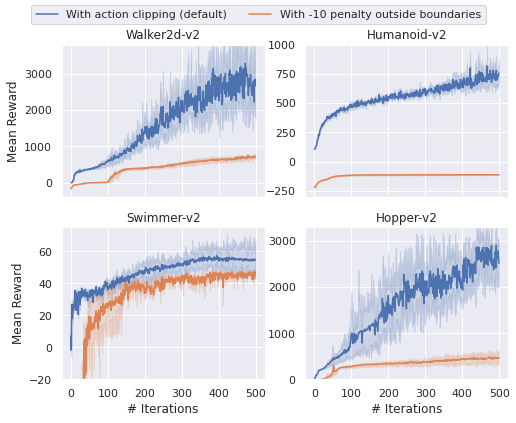

In [71]:
# Plot setup
# CLIP, no adjust std
fig, ax = plt.subplots(2,2, figsize=(8,6), sharex=True)
ax = ax.flatten()

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=False, adjust_init_std=False,
                     policy_net_type='CtsPolicy', norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"With action clipping (default)", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, adjust_init_std=False, policy_net_type='CtsPolicy',
                     norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"With -10 penalty outside boundaries", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
ax[2].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
ax[0].set_ylim([None, 3800])
ax[1].set_ylim([-300, 1000])
ax[2].set_ylim([-20, 75])
ax[3].set_ylim([0, 3300])
fig.subplots_adjust(top=0.9)
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
fig.subplots_adjust(top=0.9)
    
plt.show()

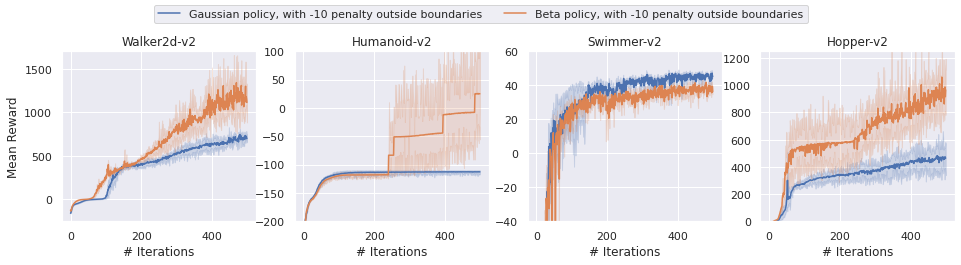

In [64]:
# Plot setup
# CLIP, no adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,3.5))

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, adjust_init_std=False,
                     policy_net_type='CtsPolicy', norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=10,
                 ax=ax.flatten()[j], label=f"Gaussian policy, with -10 penalty outside boundaries", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, adjust_init_std=False, policy_net_type='CtsBetaPolicy',
                     norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=10,
                 ax=ax.flatten()[j], label=f"Beta policy, with -10 penalty outside boundaries", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
ax[0].set_ylim([None, 1700])
ax[1].set_ylim([-200, 100])
ax[2].set_ylim([-40, 60])
ax[3].set_ylim([0, 1250])
fig.subplots_adjust(top=0.9)
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
fig.subplots_adjust(top=0.8)
    
plt.show()

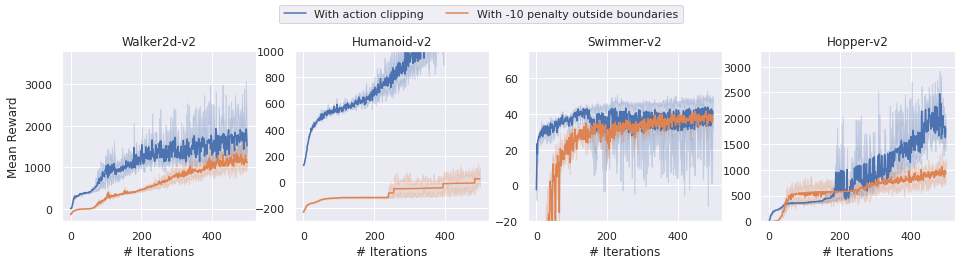

In [56]:
# Plot setup
# CLIP, no adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,3.5))

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=False, adjust_init_std=False,
                     policy_net_type='CtsBetaPolicy', norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=10,
                 ax=ax.flatten()[j], label=f"With action clipping", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, adjust_init_std=False, policy_net_type='CtsBetaPolicy',
                     norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=10,
                 ax=ax.flatten()[j], label=f"With -10 penalty outside boundaries", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
ax[0].set_ylim([None, 3800])
ax[1].set_ylim([-300, 1000])
ax[2].set_ylim([-20, 75])
ax[3].set_ylim([0, 3300])
fig.subplots_adjust(top=0.9)
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
fig.subplots_adjust(top=0.8)
    
plt.show()

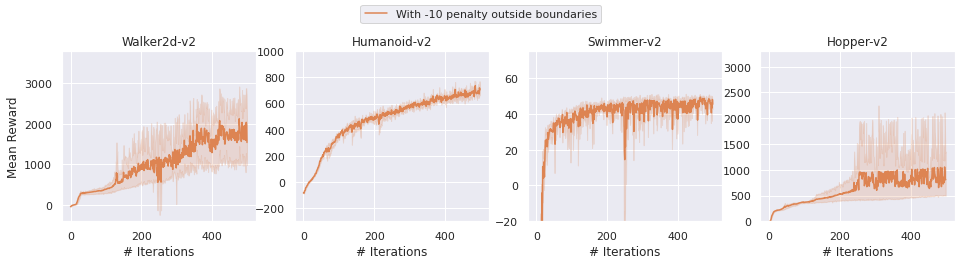

In [50]:
# Plot setup
# CLIP, no adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,3.5))

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=False, adjust_init_std=True,
                     policy_net_type='CtsPolicy', norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"With action clipping", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, adjust_init_std=True, policy_net_type='CtsPolicy',
                     norm_advantages=True)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"With -10 penalty outside boundaries", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
ax[0].set_ylim([None, 3800])
ax[1].set_ylim([-300, 1000])
ax[2].set_ylim([-20, 75])
ax[3].set_ylim([0, 3300])
fig.subplots_adjust(top=0.9)
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
fig.subplots_adjust(top=0.8)
    
plt.show()

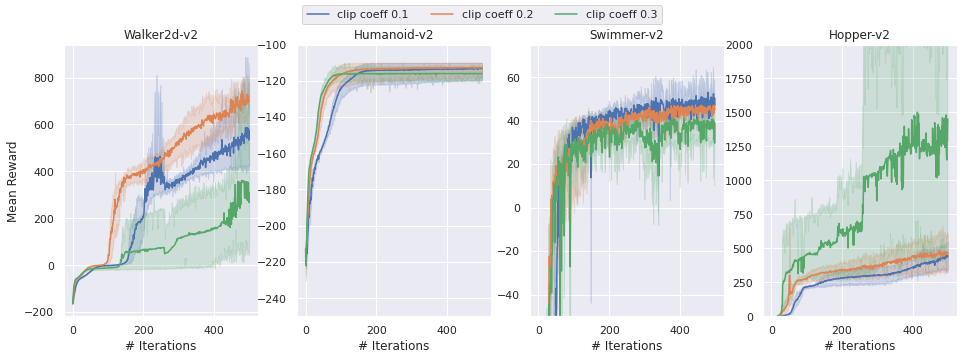

In [14]:
# Plot setup
# CLIP, no adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,5))

for j, g in enumerate(games):
    for k in code_level_opts['clip_eps']:
        filt = filter_df(opt, game=g, clip_eps=k, kl_penalty_coeff=0.0, norm_rewards='returns',
                         strict_action_bounds=True, adjust_init_std=False)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"clip coeff {k}", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
ax[1].set_ylim([-250, -100])
ax[2].set_ylim([-50, 75])
ax[3].set_ylim([0, 2000])
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
    
plt.show()

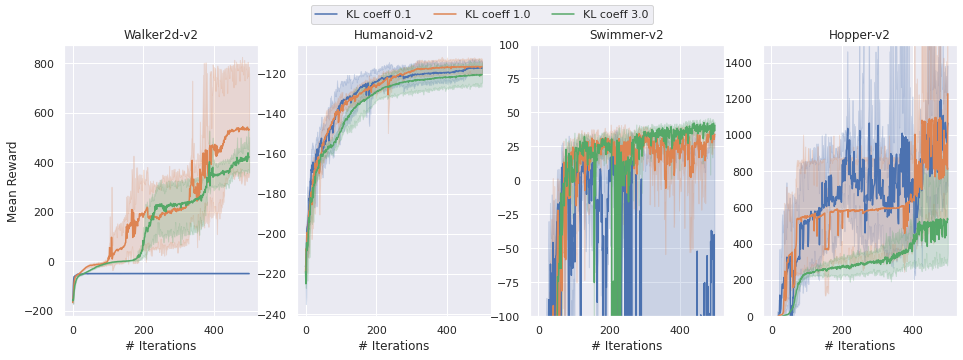

In [17]:
# Plot setup
# KL, no adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,5))

for j, g in enumerate(games):
    for k in code_level_opts['kl_penalty_coeff']:
        filt = filter_df(opt, game=g, clip_eps=1e8, kl_penalty_coeff=k, norm_rewards='returns',
                         strict_action_bounds=True, adjust_init_std=False)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"KL coeff {k}", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
#ax[1].set_ylim([-100, 100])
#ax[2].set_ylim([-100, 10])
ax[2].set_ylim([-100, 100])
ax[3].set_ylim([0, 1500])
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
    
plt.show()

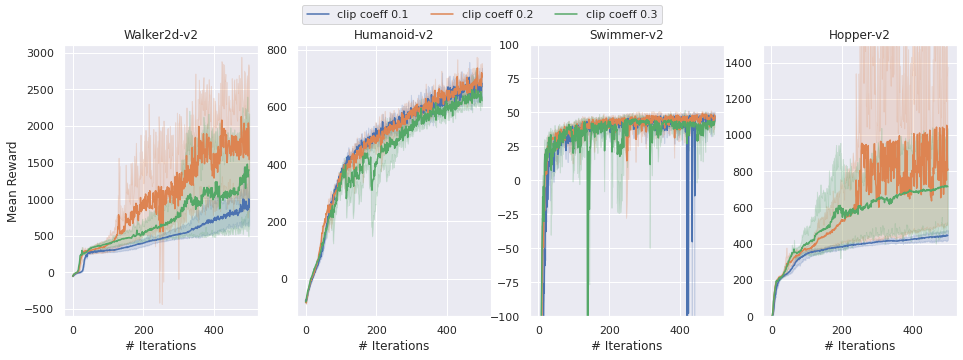

In [15]:
# Plot setup
# CLIP, adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,5))

for j, g in enumerate(games):
    for k in code_level_opts['clip_eps']:
        filt = filter_df(opt, game=g, clip_eps=k, kl_penalty_coeff=0.0, norm_rewards='returns',
                         strict_action_bounds=True, adjust_init_std=True)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"clip coeff {k}", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
#ax[1].set_ylim([-100, 100])
#ax[2].set_ylim([-100, 10])
ax[2].set_ylim([-100, 100])
ax[3].set_ylim([0, 1500])
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
    
plt.show()

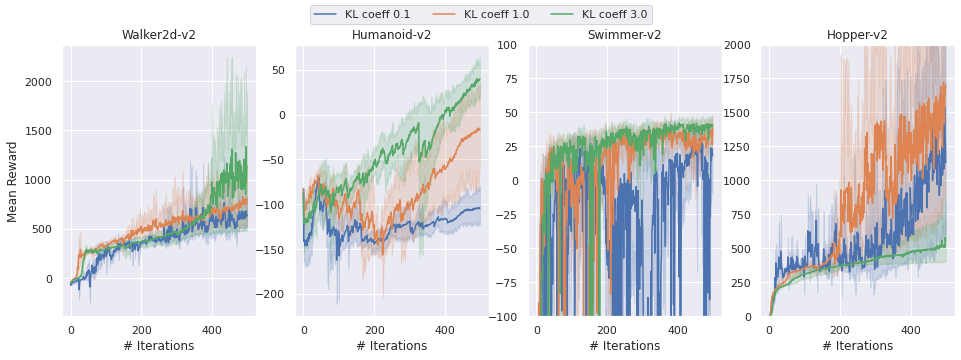

In [18]:
# Plot setup
# KL, adjust std
fig, ax = plt.subplots(1, 4, figsize=(16,5))

for j, g in enumerate(games):
    for k in code_level_opts['kl_penalty_coeff']:
        filt = filter_df(opt, game=g, clip_eps=1e8, kl_penalty_coeff=k, norm_rewards='returns',
                         strict_action_bounds=True, adjust_init_std=True)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"KL coeff {k}", legend=False)
    ax[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
#ax[1].set_ylim([-100, 100])
#ax[2].set_ylim([-100, 10])
ax[2].set_ylim([-100, 100])
ax[3].set_ylim([0, 2000])
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
    
plt.show()

# Below: older plots with 0 reward outside boundaries

In [3]:
r = readers.CollectionReader('../src/strict_bds/agents')

100%|██████████| 120/120 [00:09<00:00, 12.72it/s]


In [4]:
games = ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2"]
code_level_opts = {
      'clip_eps': [0.1, 0.2, 0.3, 1e8],
      'kl_penalty_coeff': [0.0],
      'strict_action_bounds': [True],
      'norm_rewards': ['returns'],
      'policy_net_type': ['CtsPolicy'],
      "adjust_init_std": [False, True],
}

In [5]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

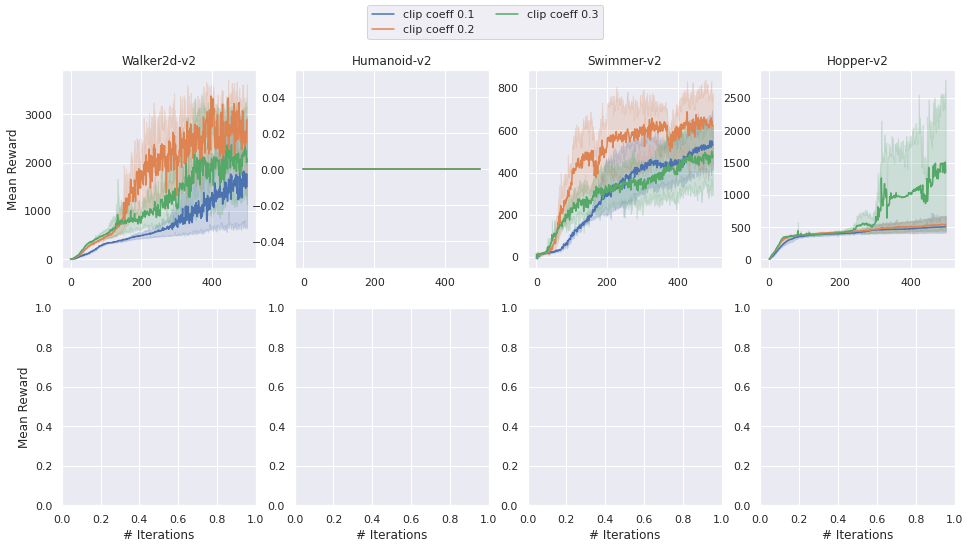

In [8]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['clip_eps']:
        filt = filter_df(opt, game=g, clip_eps=k, kl_penalty_coeff=0.0, norm_rewards='returns',
                         strict_action_bounds=True, adjust_init_std=False)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"clip coeff {k}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
    
plt.show()

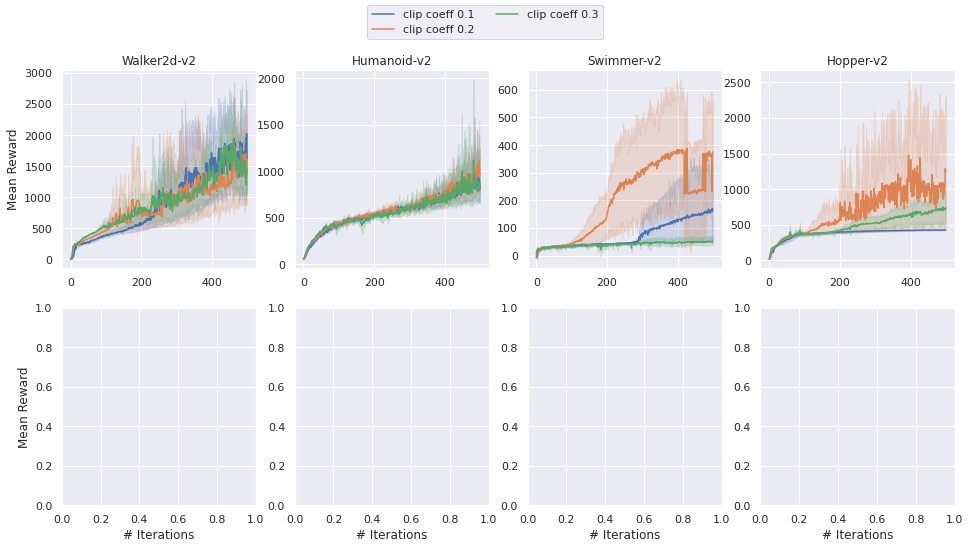

In [9]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['clip_eps']:
        filt = filter_df(opt, game=g, clip_eps=k, kl_penalty_coeff=0.0, norm_rewards='returns',
                         strict_action_bounds=True, adjust_init_std=True)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"clip coeff {k}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
    
plt.show()

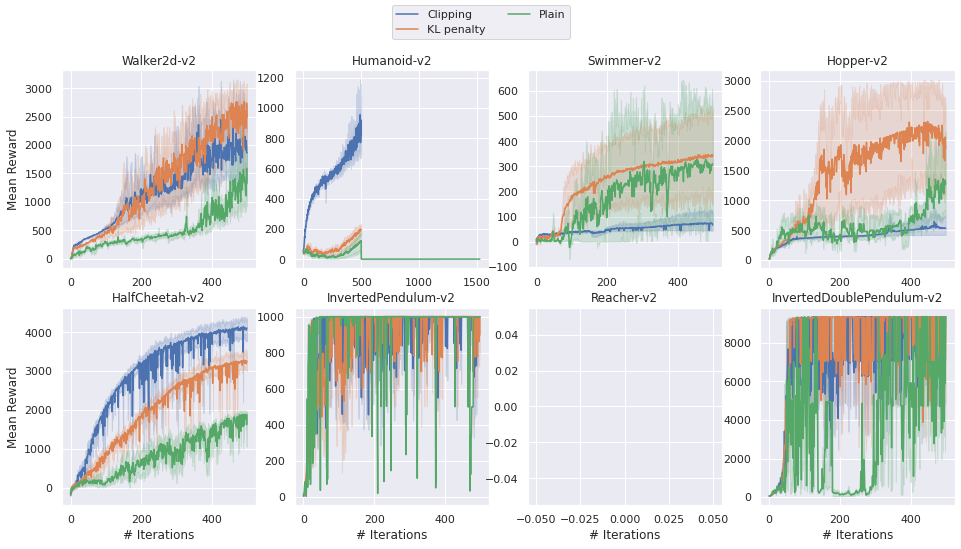

In [10]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, policy_net_type='CtsPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"Clipping", legend=False)
    filt = filter_df(opt, game=g, clip_eps=1e8, kl_penalty_coeff=1.0, norm_rewards='returns',
                     strict_action_bounds=True, policy_net_type='CtsPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"KL penalty", legend=False)
    filt = filter_df(opt, game=g, clip_eps=1e8, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, policy_net_type='CtsPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"Plain", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
    
plt.show()

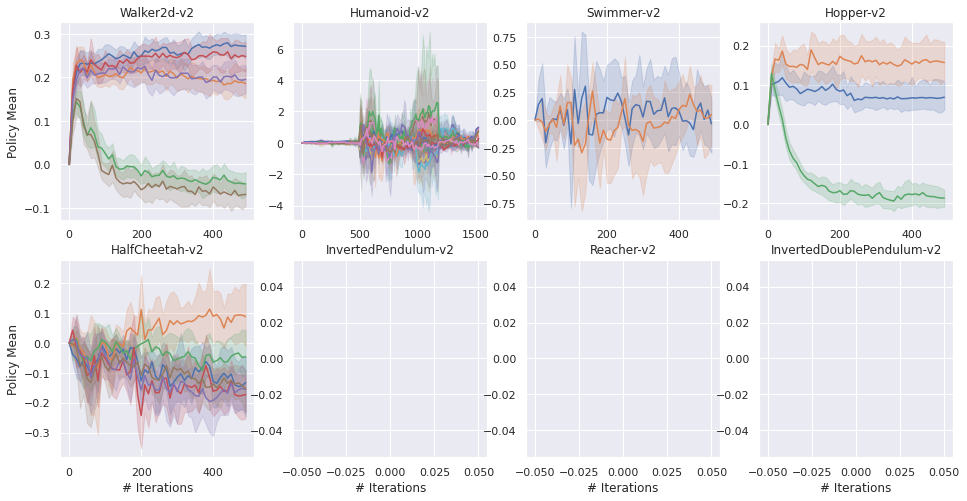

In [12]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_df(constraints, game=g)
        for d in range(17):
            sns.lineplot(filt.opt_step, filt[f'mean_{d}'], n_boot=100,
                         ax=ax.flatten()[j], legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Policy Mean')
ax[1][0].set_ylabel('Policy Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')

plt.show()

In [6]:
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [7]:
constraints

,avg_kl_old_to_new,avg_kl_new_to_old,avg_ratio,avg_rat_minus_one_sq,max_ratio,opt_step,mean_0,mean_1,mean_2,mean_3,...,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,exp_id
0,0.075064,0.074524,1.001962,0.183261,6.702912,0,-0.000549,0.000870,0.000997,0.001116,...,-0.000123,-0.000189,-0.000777,-0.000364,0.001716,0.000339,0.000635,0.000279,0.000651,2e22de05-e98d-4f73-9505-742c30477da5
1,0.064831,0.064129,1.030921,0.165096,3.990045,1,0.006176,0.001517,0.001120,0.000978,...,-0.000987,-0.001752,0.003720,0.003959,-0.003891,-0.000759,0.001235,-0.005040,0.006321,2e22de05-e98d-4f73-9505-742c30477da5
2,0.053539,0.053592,1.017528,0.123446,3.273206,2,0.004461,0.003730,0.001964,-0.001589,...,-0.002730,0.001019,0.005839,-0.001975,-0.007322,-0.000557,-0.003036,-0.008472,0.004862,2e22de05-e98d-4f73-9505-742c30477da5
3,0.038829,0.038689,1.010600,0.085979,2.667455,3,0.006762,0.001779,0.001353,0.002787,...,-0.002653,-0.001005,0.020128,-0.004172,-0.011106,-0.005815,-0.002674,-0.008288,0.011662,2e22de05-e98d-4f73-9505-742c30477da5
4,0.026563,0.026468,1.006490,0.057726,2.235494,4,0.009375,0.005564,0.005854,0.000871,...,-0.001178,0.002556,0.023841,-0.003340,-0.008265,-0.008274,-0.005274,-0.006101,0.012841,2e22de05-e98d-4f73-9505-742c30477da5


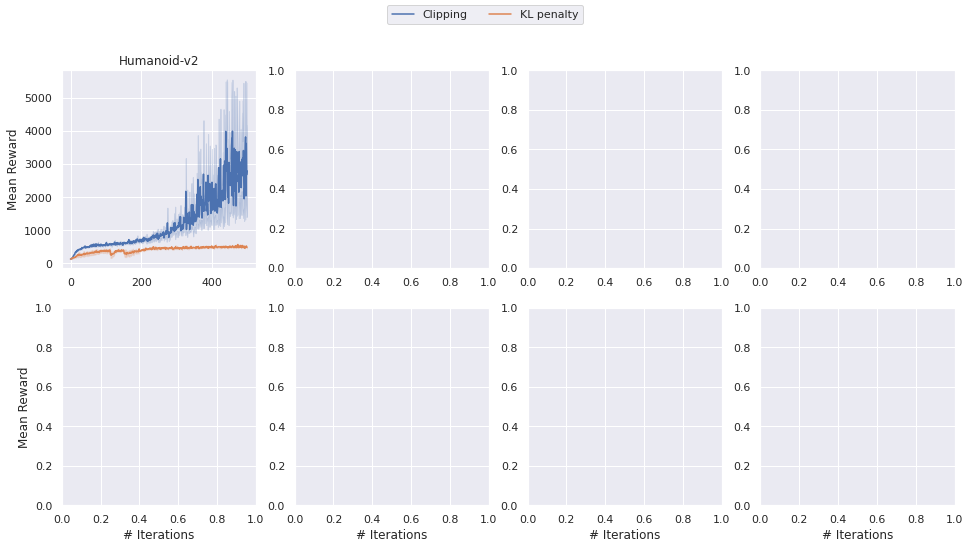

In [11]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     strict_action_bounds=True, policy_net_type='CtsBetaPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"Clipping", legend=False)
    filt = filter_df(opt, game=g, clip_eps=1e8, kl_penalty_coeff=3.0, norm_rewards='returns',
                     strict_action_bounds=True, policy_net_type='CtsBetaPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"KL penalty", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
    
plt.show()